<a href="https://colab.research.google.com/github/spponns/Machine-Learning/blob/main/Telephone_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pickle
from  google.colab import files
import io
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [2]:

data=files.upload()



Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [3]:
data=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df=data
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data = data.iloc[:,1:]
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
data.TotalCharges=pd.to_numeric(data.TotalCharges,errors='coerce')
data.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [6]:
data.TotalCharges.fillna(data.TotalCharges.mean(), inplace=True)
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["gender"]=le.fit_transform(data["gender"])
data["Partner"]=le.fit_transform(data["Partner"])
data["Dependents"]=le.fit_transform(data["Dependents"])
data["PhoneService"]=le.fit_transform(data["PhoneService"])
data["MultipleLines"]=le.fit_transform(data["MultipleLines"])
data["InternetService"]=le.fit_transform(data["InternetService"])
data["OnlineSecurity"]=le.fit_transform(data["OnlineSecurity"])
data["OnlineBackup"]=le.fit_transform(data["OnlineBackup"])
data["DeviceProtection"]=le.fit_transform(data["DeviceProtection"])
data["TechSupport"]=le.fit_transform(data["TechSupport"])
data["StreamingTV"]=le.fit_transform(data["StreamingTV"])
data["StreamingMovies"]=le.fit_transform(data["StreamingMovies"])
data["Contract"]=le.fit_transform(data["Contract"])
data["PaperlessBilling"]=le.fit_transform(data["PaperlessBilling"])
data["PaymentMethod"]=le.fit_transform(data["PaymentMethod"])
data["Churn"]=le.fit_transform(data["Churn"])

In [8]:
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [10]:
x=data.iloc[:,0:19].values
y=data.iloc[:,19:20].values

In [11]:
x


array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0000e+00, 2.9850e+01,
        2.9850e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.0000e+00, 5.6950e+01,
        1.8895e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.0000e+00, 5.3850e+01,
        1.0815e+02],
       ...,
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0000e+00, 2.9600e+01,
        3.4645e+02],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 3.0000e+00, 7.4400e+01,
        3.0660e+02],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0565e+02,
        6.8445e+03]])

In [12]:
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [13]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
a=one.fit_transform(x[:,6:7]).toarray()
b=one.fit_transform(x[:,7:8]).toarray()
c=one.fit_transform(x[:,8:9]).toarray()
d=one.fit_transform(x[:,9:10]).toarray()
e=one.fit_transform(x[:,10:11]).toarray()
f=one.fit_transform(x[:,11:12]).toarray()
g=one.fit_transform(x[:,12:13]).toarray()
h=one.fit_transform(x[:,13:14]).toarray()
i=one.fit_transform(x[:,14:15]).toarray()
j=one.fit_transform(x[:,16:17]).toarray()
x=np.delete(x,[6,7,8,9,10,11,12,13,14,16],axis=1)
x=np.concatenate((a,b,c,d,e,f,g,h,i,j,x),axis=1)


In [14]:
x


array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 2.9850e+01,
        2.9850e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 5.6950e+01,
        1.8895e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 5.3850e+01,
        1.0815e+02],
       ...,
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 2.9600e+01,
        3.4645e+02],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.4400e+01,
        3.0660e+02],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.0565e+02,
        6.8445e+03]])

In [15]:
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [16]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_resampled, y_resampled = sm.fit_resample(x, y)

In [17]:
x_resampled

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 2.98500000e+01, 2.98500000e+01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.69500000e+01, 1.88950000e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 5.38500000e+01, 1.08150000e+02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.01372937e+02, 2.48954129e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.07716086e+02, 5.53516561e+03],
       [4.85936934e-01, 0.00000000e+00, 5.14063066e-01, ...,
        5.14063066e-01, 9.20199927e+01, 1.71654212e+03]])

In [18]:
y_resampled

array([0, 0, 1, ..., 1, 1, 1])

In [19]:
x.shape,x_resampled.shape

((7043, 40), (10348, 40))

In [20]:
y.shape,y_resampled.shape

((7043, 1), (10348,))

In [21]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<ipython-input-22-3bd718de5fe4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["tenure"])
<ipython-input-22-3bd718de5fe4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["MonthlyCharges"])


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

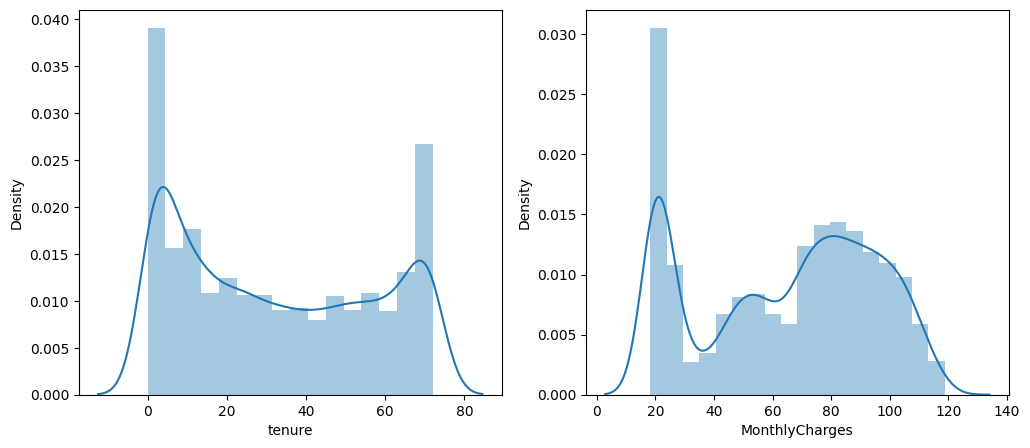

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(data["tenure"])
plt.subplot(1,2,2)
sns.distplot(data["MonthlyCharges"])

<Axes: ylabel='count'>

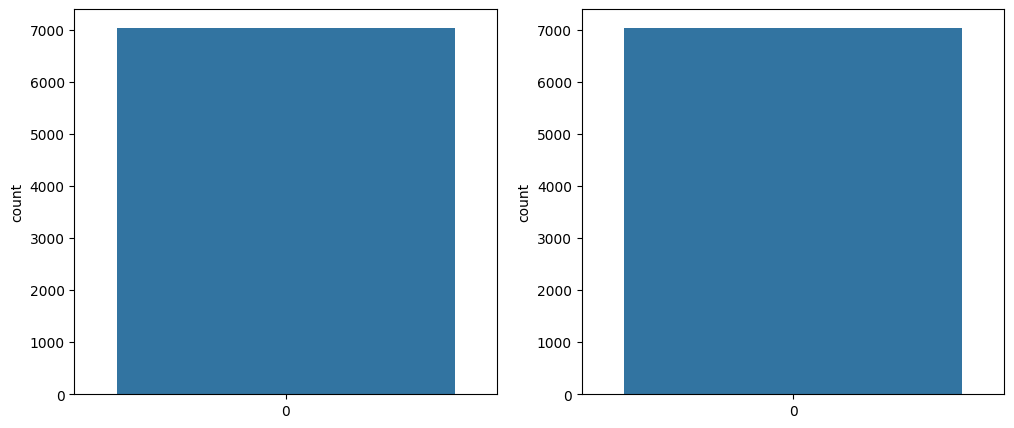

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data["gender"])
plt.subplot(1,2,2)
sns.countplot(data["Dependents"])

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

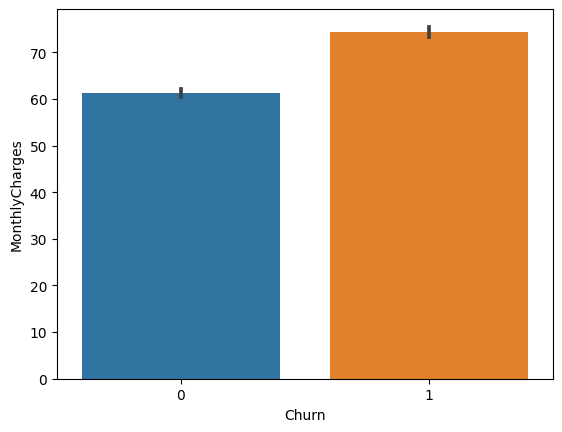

In [24]:
sns.barplot(x="Churn",y="MonthlyCharges",data=data)

<Axes: >

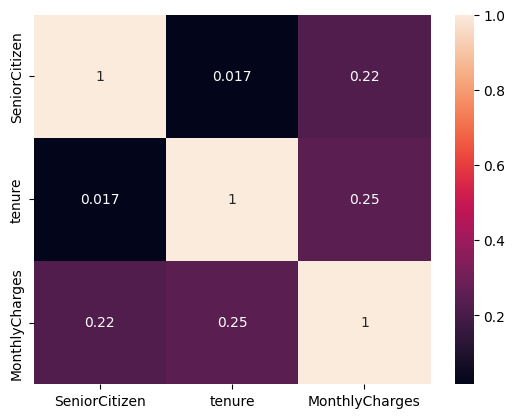

In [25]:
sns.heatmap(df.corr(),annot=True)

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned

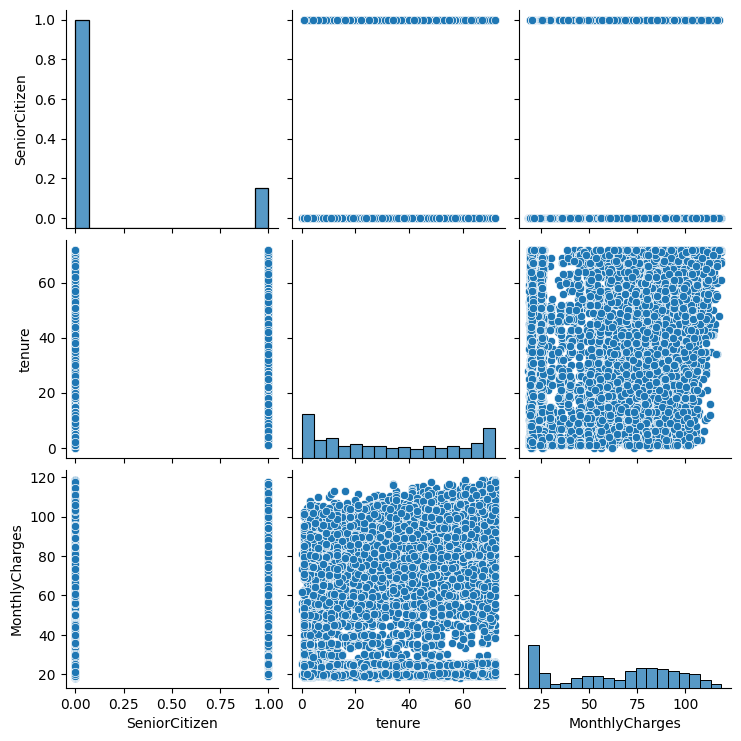

In [26]:
sns.pairplot(data=df,markers=["^","v"],palette="inferno")

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_train.shape

(8278, 40)

In [29]:
def logreg(x_train,x_test,y_train,y_test):
  lr=LogisticRegression(random_state=0)
  lr.fit(x_train,y_train)
  ylt=lr.predict(x_train)
  print("Accuracy Score :",accuracy_score(ylt,y_train))
  yPred_lr=lr.predict(x_test)
  print("Accuracy Test :",accuracy_score(yPred_lr,y_test))
  print("Logistic Regression")
  print("Confusion Matrix")
  print(confusion_matrix(y_test, yPred_lr))
  print("Classification Reprot")
  print(classification_report(y_test, yPred_lr))

logreg(x_train,x_test,y_train,y_test)

Accuracy Score : 0.7726503986470162
Accuracy Test : 0.7801932367149759
Logistic Regression
Confusion Matrix
[[762 271]
 [184 853]]
Classification Reprot
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1033
           1       0.76      0.82      0.79      1037

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



In [30]:
def dTree(x_train,x_test,y_train,y_test):
  dtc=DecisionTreeClassifier(criterion="entropy",random_state=0)
  dtc.fit(x_train,y_train)
  y_dt_tr=dtc.predict(x_train)
  print("Accuracy Score :",accuracy_score(y_dt_tr,y_train))
  yPred_dt=dtc.predict(x_test)
  print("Accuracy Test :",accuracy_score(yPred_dt,y_test))
  print("Decsion Tree")
  print("Confusion Matrix")
  print(confusion_matrix(y_test, yPred_dt))
  print("Classification Reprot")
  print(classification_report(y_test, yPred_dt))

dTree(x_train,x_test,y_train,y_test)

Accuracy Score : 0.9981879681082387
Accuracy Test : 0.7888888888888889
Decsion Tree
Confusion Matrix
[[685 348]
 [ 89 948]]
Classification Reprot
              precision    recall  f1-score   support

           0       0.89      0.66      0.76      1033
           1       0.73      0.91      0.81      1037

    accuracy                           0.79      2070
   macro avg       0.81      0.79      0.79      2070
weighted avg       0.81      0.79      0.79      2070



In [31]:
def RandomForest(x_train,x_test,y_train,y_test):
  rf=RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
  rf.fit(x_train,y_train)
  y_rf_tr=rf.predict(x_train)
  print("Accuracy Score :",accuracy_score(y_rf_tr,y_train))
  yPred_rf=rf.predict(x_test)
  print("Accuracy Test :",accuracy_score(yPred_rf,y_test))
  print("Random Forest")
  print("Confusion Matrix")
  print(confusion_matrix(y_test, yPred_rf))
  print("Classification Reprot")
  print(classification_report(y_test, yPred_rf))

RandomForest(x_train,x_test,y_train,y_test)

Accuracy Score : 0.9890070065233149
Accuracy Test : 0.7922705314009661
Random Forest
Confusion Matrix
[[701 332]
 [ 98 939]]
Classification Reprot
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      1033
           1       0.74      0.91      0.81      1037

    accuracy                           0.79      2070
   macro avg       0.81      0.79      0.79      2070
weighted avg       0.81      0.79      0.79      2070



In [32]:
def KNN(x_train,x_test,y_train,y_test):
  knn=KNeighborsClassifier()
  knn.fit(x_train,y_train)
  y_knn_tr=knn.predict(x_train)
  print("Accuracy Score :",accuracy_score(y_knn_tr,y_train))
  yPred_knn=knn.predict(x_test)
  print("Accuracy Test :",accuracy_score(yPred_knn,y_test))
  print("KNN")
  print("Confusion Matrix")
  print(confusion_matrix(y_test, yPred_knn))
  print("Classification Reprot")
  print(classification_report(y_test, yPred_knn))

KNN(x_train,x_test,y_train,y_test)

Accuracy Score : 0.851171780623339
Accuracy Test : 0.7956521739130434
KNN
Confusion Matrix
[[720 313]
 [110 927]]
Classification Reprot
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      1033
           1       0.75      0.89      0.81      1037

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.79      2070
weighted avg       0.81      0.80      0.79      2070



In [33]:
def SVM(x_train,x_test,y_train,y_test):
  svm=KNeighborsClassifier()
  svm.fit(x_train,y_train)
  y_svm_tr=svm.predict(x_train)
  print("Accuracy Score :",accuracy_score(y_svm_tr,y_train))
  yPred_svm=svm.predict(x_test)
  print("Accuracy Test :",accuracy_score(yPred_svm,y_test))
  print("SVM")
  print("Confusion Matrix")
  print(confusion_matrix(y_test, yPred_svm))
  print("Classification Reprot")
  print(classification_report(y_test, yPred_svm))

SVM(x_train,x_test,y_train,y_test)

Accuracy Score : 0.851171780623339
Accuracy Test : 0.7956521739130434
SVM
Confusion Matrix
[[720 313]
 [110 927]]
Classification Reprot
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      1033
           1       0.75      0.89      0.81      1037

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.79      2070
weighted avg       0.81      0.80      0.79      2070



In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier=Sequential()
classifier.add(Dense(units=30, activation="relu",input_dim=40))
classifier.add(Dense(units=30, activation="relu"))
classifier.add(Dense(units=1, activation="sigmoid"))
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [35]:
model_histroty=classifier.fit(x_train,y_train, batch_size=10, validation_split=0.33,epochs=200)

Epoch 1/200
555/555 [==============================] - 3s 3ms/step - loss: 0.5095 - accuracy: 0.7413 - val_loss: 0.4750 - val_accuracy: 0.7687
Epoch 2/200
555/555 [==============================] - 2s 3ms/step - loss: 0.4637 - accuracy: 0.7773 - val_loss: 0.4680 - val_accuracy: 0.7731
Epoch 3/200
555/555 [==============================] - 2s 3ms/step - loss: 0.4493 - accuracy: 0.7908 - val_loss: 0.4627 - val_accuracy: 0.7723
Epoch 4/200
555/555 [==============================] - 1s 3ms/step - loss: 0.4365 - accuracy: 0.7981 - val_loss: 0.4537 - val_accuracy: 0.7782
Epoch 5/200
555/555 [==============================] - 2s 3ms/step - loss: 0.4248 - accuracy: 0.8035 - val_loss: 0.4470 - val_accuracy: 0.7796
Epoch 6/200
555/555 [==============================] - 2s 3ms/step - loss: 0.4170 - accuracy: 0.8103 - val_loss: 0.4580 - val_accuracy: 0.7840
Epoch 7/200
555/555 [==============================] - 1s 2ms/step - loss: 0.4063 - accuracy: 0.8152 - val_loss: 0.4507 - val_accuracy: 0.7778

In [36]:
ann_pred=classifier.predict(x_test)
ann_pred=(ann_pred>0.5)
ann_pred

65/65 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [37]:
print("Accuracy Test :",accuracy_score(ann_pred,y_test))
print("ANN model")
print("Confusion Matrix")
print(confusion_matrix(y_test, ann_pred))
print("Classification Reprot")
print(classification_report(y_test, ann_pred))


Accuracy Test : 0.808695652173913
ANN model
Confusion Matrix
[[759 274]
 [122 915]]
Classification Reprot
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1033
           1       0.77      0.88      0.82      1037

    accuracy                           0.81      2070
   macro avg       0.82      0.81      0.81      2070
weighted avg       0.82      0.81      0.81      2070



In [38]:
lr=LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
print("Predicting on random input")
lr_pred_own=lr.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is :", lr_pred_own)

Predicting on random input
output is : [0]


In [39]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=0)
dtc.fit(x_train,y_train)
print("Predicting on random input")
dtc_pred_own=dtc.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is :", dtc_pred_own)

Predicting on random input
output is : [1]


In [40]:
rf=RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
rf.fit(x_train,y_train)
print("Predicting on random input")
rf_pred_own=rf.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is :", rf_pred_own)

Predicting on random input
output is : [0]


In [41]:
print("Predicting on random input")
ann_pred_own=classifier.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
ann_pred_own=(ann_pred_own>0.5)
print("output is :", ann_pred_own)

Predicting on random input
1/1 [==============================] - 0s 23ms/step
output is : [[ True]]


In [42]:
svc=SVC(kernel="linear")
svc.fit(x_train,y_train)
print("Predicting on random input")
svm_pred_own=svc.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is :", svm_pred_own)

Predicting on random input
output is : [0]


In [43]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("Predicting on random input")
knn_pred_own=knn.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is :", knn_pred_own)


Predicting on random input
output is : [0]


In [44]:
print("Predicting on random input")
ann_pred_own=classifier.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print(ann_pred_own)
ann_pred_own=(ann_pred_own>0.5)
print("output is :", ann_pred_own)



Predicting on random input
1/1 [==============================] - 0s 43ms/step
[[1.]]
output is : [[ True]]


In [53]:
def comp_mod(x_train,x_test,y_train,y_test):
  logreg(x_train,x_test,y_train,y_test)
  print("-"*100)
  dTree(x_train,x_test,y_train,y_test)
  print("-"*100)
  RandomForest(x_train,x_test,y_train,y_test)
  print("-"*100)
  SVM(x_train,x_test,y_train,y_test)
  print("-"*100)
  KNN(x_train,x_test,y_train,y_test)
  print("-"*100)

In [54]:
comp_mod(x_train,x_test,y_train,y_test)

Accuracy Score : 0.7726503986470162
Accuracy Test : 0.7801932367149759
Logistic Regression
Confusion Matrix
[[762 271]
 [184 853]]
Classification Reprot
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1033
           1       0.76      0.82      0.79      1037

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070

----------------------------------------------------------------------------------------------------
Accuracy Score : 0.9981879681082387
Accuracy Test : 0.7888888888888889
Decsion Tree
Confusion Matrix
[[685 348]
 [ 89 948]]
Classification Reprot
              precision    recall  f1-score   support

           0       0.89      0.66      0.76      1033
           1       0.73      0.91      0.81      1037

    accuracy                           0.79      2070
   macro avg       0.81      0.79      0.79      2070
w

In [63]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_rf=model.predict(x_train)
print(accuracy_score(y_rf,y_train))
y_pred_rcv=model.predict(x_test)
print(accuracy_score(y_pred_rcv,y_test))
print("**Random Forest after Hyperparameter tuning**")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rcv))
print("Classification Reprot")
print(classification_report(y_test, y_pred_rcv))
print("Predicting on random input")
rfcv_pred_own=model.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is :", rfcv_pred_own)

0.9981879681082387
0.7990338164251207
**Random Forest after Hyperparameter tuning**
Confusion Matrix
[[678 355]
 [ 61 976]]
Classification Reprot
              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1033
           1       0.73      0.94      0.82      1037

    accuracy                           0.80      2070
   macro avg       0.83      0.80      0.79      2070
weighted avg       0.83      0.80      0.79      2070

Predicting on random input
output is : [0]


In [65]:
classifier.save("telecom_churn.h5")